In [1]:
# Importing relevent libraries.
import zipfile
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
sns.set_theme(style="whitegrid")

#### Unzipping 'Project.zip' file. Both zip file and python script must be in the same folder.

In [3]:
with zipfile.ZipFile('Project.zip', 'r') as zip_ref:
    zip_ref.extractall()

#### Data acquisition of the movielens dataset.

In [4]:
users_dataset = pd.read_csv('Project4_Movielens/users.dat', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], sep='::', engine='python')
ratings_dataset = pd.read_csv('Project4_Movielens/ratings.dat', header=None,  names=['UserID', 'MovieID', 'Rating', 'Timestamp'], sep='::', engine='python')
movies_dataset = pd.read_csv('Project4_Movielens/movies.dat', header=None, names=['MovieID', 'Title', 'Genres'], sep='::', engine='python')

#### Checking if null values exists in columns.

In [5]:
users_dataset.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

#### Merging 3 datasets together.

In [6]:
df = pd.merge(pd.merge(users_dataset, ratings_dataset, on='UserID'), movies_dataset, on='MovieID')
df.loc[df['Age'] ==1, 'Age Group'] = 'Under 18'
df.loc[df['Age'] ==18, 'Age Group'] = '18-24'
df.loc[df['Age'] ==25, 'Age Group'] = '25-34'
df.loc[df['Age']==35, 'Age Group'] = '35-44'
df.loc[df['Age'] ==45, 'Age Group'] = '45-49'
df.loc[df['Age'] ==50, 'Age Group'] = '50-55'
df.loc[df['Age']==56, 'Age Group'] = '56+'

### Function to create a plotly chart.
###### Remove png from figure.show('png') to make chart interactive.

In [7]:
def show_chart(x, y, title, xaxis, yaxis):
    data = [
    go.Bar(
        x = x,
        y = y,
        marker_color='rgb(255, 130, 139)'
    )]
    figure = go.Figure(data=data, layout=go.Layout({
        'barmode': 'group',
        'legend': {'orientation': 'h'},
        'title': {'text': title},
        'xaxis': {'title': {'text': xaxis}},
        'yaxis': {'title': {'text': yaxis}},
    }))
    figure.update_xaxes(type='category')
    figure.data[0].marker.line.width = 1
    figure.data[0].marker.line.color = "black"
    return figure.show('png') # Remove png to make plotly charts interactive

#### Visualization of user age distribution.

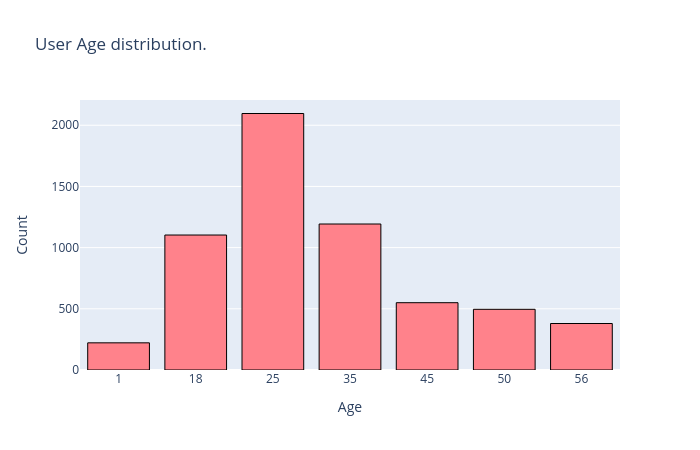

In [8]:
df1 = users_dataset.groupby(['Age']).size().reset_index(name='Count')

# Calling 'show_chart' function to create a plotly chart with given data. 
show_chart(
    x = df1['Age'].values,
    y = df1['Count'].values,
    title = 'User Age distribution.',
    xaxis = 'Age',
    yaxis = 'Count'
)

#### Visualization overall rating by users.

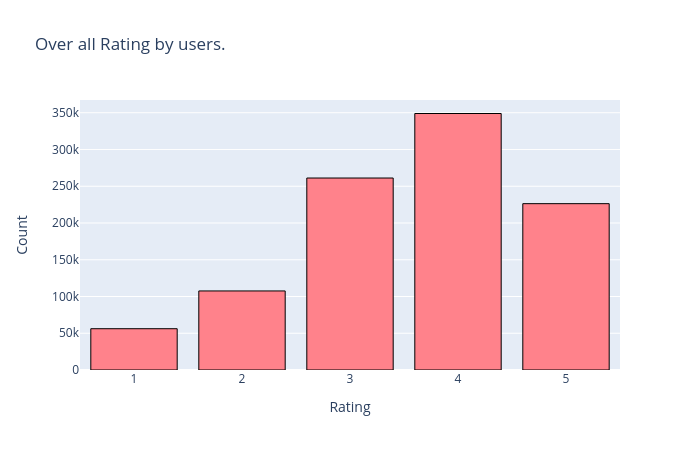

In [9]:
df2 = df['Rating'].value_counts().reset_index(name='Count').sort_values(['index'], ascending=True)

# Calling 'show_chart' function to create a plotly chart with given data.
show_chart(
    x = df2['index'].values,
    y = df2['Count'].values,
    title = 'Over all Rating by users.',
    xaxis = 'Rating',
    yaxis = 'Count'
)

#### Average user rating of the movie 'Toy Story'.

In [10]:
df.loc[df['Title']=='Toy Story (1995)']['Rating'].mean()

4.146846413095811

#### Value counts of each ratings for the movie "Toy story".

In [11]:
df.loc[df['Title']=='Toy Story (1995)']['Rating'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

#### visualization of user ratings for the movie “Toy Story”. 

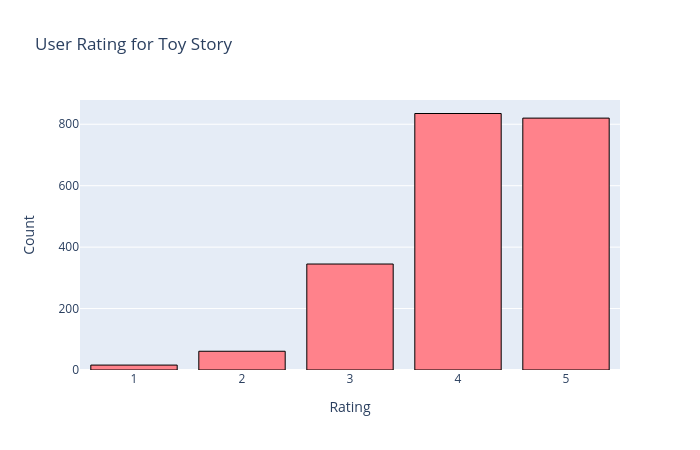

In [12]:
df3 = df.loc[df['Title']=='Toy Story (1995)']['Rating'].value_counts().reset_index(name='Count').sort_values(['index'], ascending=True)

# Calling 'show_chart' function to create a plotly chart with given data.
show_chart(
    x = df3['index'].values,
    y = df3['Count'].values,
    title = 'User Rating for Toy Story',
    xaxis = 'Rating',
    yaxis = 'Count'
)

#### Viewership of the movie "Toy Story" by age group.

In [13]:
df.loc[df['Title']=='Toy Story (1995)','Age Group'].value_counts()

25-34       790
18-24       448
35-44       423
45-49       143
Under 18    112
50-55       108
56+          53
Name: Age Group, dtype: int64

#### visualization of the viewership of the movie “Toy Story” by age group.

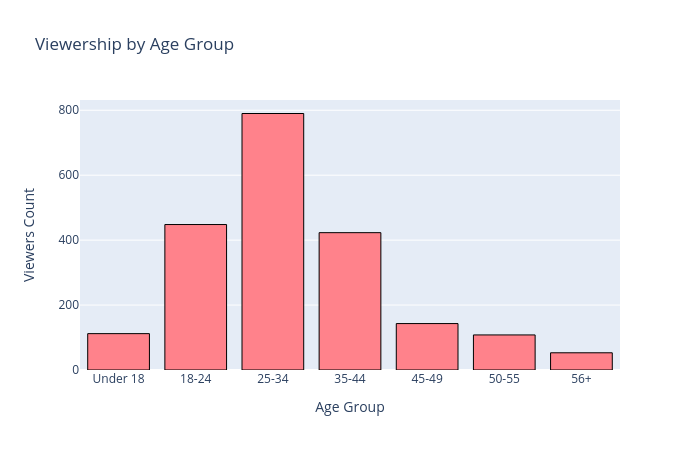

In [14]:
df5 = df.loc[df['Title']=='Toy Story (1995)','Age Group'].value_counts().reset_index(name='Count').sort_values(['index'], ascending=True)
df5_rearr = df5.apply(np.roll, shift=1,)

# Calling 'show_chart' function to create a plotly chart with given data.
show_chart(
    x = df5_rearr['index'].values,
    y = df5_rearr['Count'].values,
    title = 'Viewership by Age Group',
    xaxis = 'Age Group',
    yaxis = 'Viewers Count'
)

#### Top 25 movies by viewership rating.

In [15]:
df6 = df.groupby('Title')['Rating'].agg('mean').round(1)
df6.nlargest(25)

Title
Baby, The (1973)                                                       5.0
Bittersweet Motel (2000)                                               5.0
Follow the Bitch (1998)                                                5.0
Gate of Heavenly Peace, The (1995)                                     5.0
Lured (1947)                                                           5.0
One Little Indian (1973)                                               5.0
Schlafes Bruder (Brother of Sleep) (1995)                              5.0
Smashing Time (1967)                                                   5.0
Song of Freedom (1936)                                                 5.0
Ulysses (Ulisse) (1954)                                                5.0
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.8
Lamerica (1994)                                                        4.8
Apple, The (Sib) (1998)                                                4.7
Sanjuro (1962)     

#### Visualization of top 25 movies by viewership rating. 

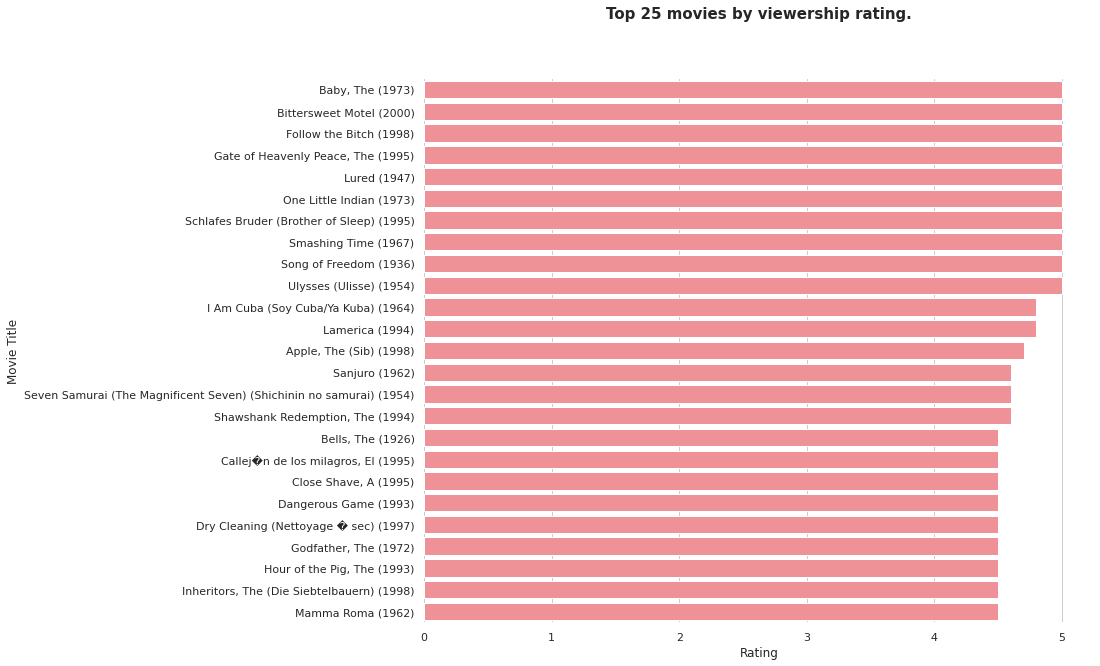

In [16]:
plt.figure(figsize = (12,10))
sns.barplot(x=df6.nlargest(25).values, y=df6.nlargest(25).index,
            color='#ff828b')

# Add title, xlabel and ylabel 
plt.title('Top 25 movies by viewership rating.', y=1.1, fontsize = 15, fontweight = 'bold')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
sns.despine(left=True, bottom=True)

#### Rating for a particular user of user id = 2696.

In [17]:
df.loc[df['UserID']==2696]

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,Age Group
24345,2696,M,25,7,24210,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,25-34
29848,2696,M,25,7,24210,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,25-34
244232,2696,M,25,7,24210,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,25-34
250014,2696,M,25,7,24210,800,5,973308842,Lone Star (1996),Drama|Mystery,25-34
273633,2696,M,25,7,24210,3386,1,973308842,JFK (1991),Drama|Mystery,25-34
277808,2696,M,25,7,24210,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,25-34
371178,2696,M,25,7,24210,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,25-34
377250,2696,M,25,7,24210,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery,25-34
598042,2696,M,25,7,24210,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller,25-34
603189,2696,M,25,7,24210,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller,25-34


#### Visualization of the rating data by user of user id = 2696. 

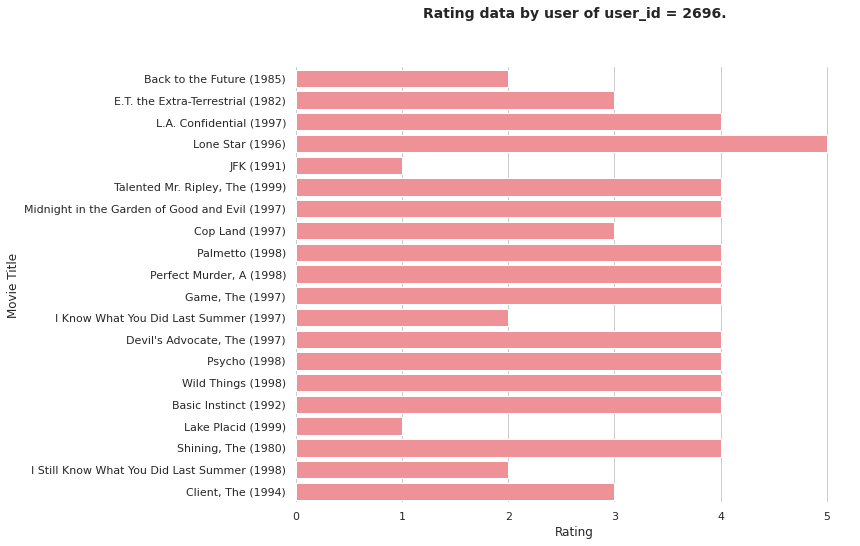

In [18]:
plt.figure(figsize = (10,8))
sns.barplot(x='Rating', y='Title', data=df.loc[df['UserID']==2696], color='#ff828b')

# Add title, xlabel and ylabel
plt.title('Rating data by user of user_id = 2696.', y=1.1, fontsize = 14, fontweight = 'bold')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
sns.despine(left=True, bottom=True)

### Machine learning.

#### Extracting First 500 records

In [19]:
preprocessed_dataset = df.iloc[:500][['Rating', 'MovieID', 'Age', 'Occupation']]

#### Converting categorical variable into dummy/indicator variables.

In [20]:
dummy_occupation = pd.get_dummies(data=preprocessed_dataset['Occupation'], prefix='Occupation')
dummy_age = pd.get_dummies(data=preprocessed_dataset['Age'], prefix='Age')
dummy_occupation.drop('Occupation_20', axis=1, inplace=True)
dummy_age.drop('Age_56', axis=1, inplace=True)
preprocessed_dataset.drop(['Age', 'Occupation'], axis=1, inplace=True)

In [21]:
processed_dataset = pd.concat([preprocessed_dataset, dummy_age, dummy_occupation], axis=1)

In [22]:
processed_dataset.corr()

,Rating,MovieID,Age_1,Age_18,Age_25,Age_35,Age_45,Age_50,Occupation_0,Occupation_1,...,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19
Rating,1.000000,NaN,-0.043823,0.036566,-0.056381,0.047779,-0.050387,0.012685,-0.073599,0.006245,...,-0.068146,0.008466,-0.015971,0.018988,0.055686,0.002155,-0.062928,0.009431,-0.009751,0.034024
MovieID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_1,-0.043823,NaN,1.000000,-0.083268,-0.115362,-0.093284,-0.053376,-0.047276,-0.027073,-0.055944,...,0.765498,-0.024246,-0.047276,-0.025456,-0.033733,-0.025456,-0.038111,-0.039751,-0.020224,0.159392
Age_18,0.036566,NaN,-0.083268,1.000000,-0.333464,-0.269648,-0.154289,-0.136655,-0.000430,-0.093666,...,-0.010839,-0.033960,-0.077954,-0.073583,-0.018147,-0.073583,-0.062842,-0.069343,-0.058460,0.009663
Age_25,-0.056381,NaN,-0.115362,-0.333464,1.000000,-0.373576,-0.213755,-0.189325,0.044483,-0.035941,...,-0.106585,0.087267,0.110240,-0.101943,-0.045090,0.015368,-0.072125,0.092692,-0.044377,0.005048
Age_35,0.047779,NaN,-0.093284,-0.269648,-0.373576,1.000000,-0.172848,-0.153093,0.023232,-0.005865,...,-0.086187,-0.010830,0.048538,-0.082434,0.014671,-0.050132,0.009575,-0.022023,0.095818,-0.038774
Age_45,-0.050387,NaN,-0.053376,-0.154289,-0.213755,-0.172848,1.000000,-0.087598,-0.012299,0.060880,...,-0.049315,-0.044926,-0.006489,0.000476,0.047152,0.048120,0.027462,0.052250,0.081490,-0.042578
Age_50,0.012685,NaN,-0.047276,-0.136655,-0.189325,-0.153093,-0.087598,1.000000,-0.057845,0.090355,...,-0.043679,0.015475,-0.077586,0.116468,0.066044,0.010972,0.118431,-0.030388,-0.033191,0.020485
Occupation_0,-0.073599,NaN,-0.027073,-0.000430,0.044483,0.023232,-0.012299,-0.057845,1.000000,-0.124013,...,-0.058998,-0.053748,-0.104798,-0.056429,-0.074776,-0.056429,-0.084481,-0.088116,-0.044832,-0.050938
Occupation_1,0.006245,NaN,-0.055944,-0.093666,-0.035941,-0.005865,0.060880,0.090355,-0.124013,1.000000,...,-0.051688,-0.047088,-0.091813,-0.049437,-0.065511,-0.049437,-0.074014,-0.077198,-0.039277,-0.044626


<AxesSubplot:>

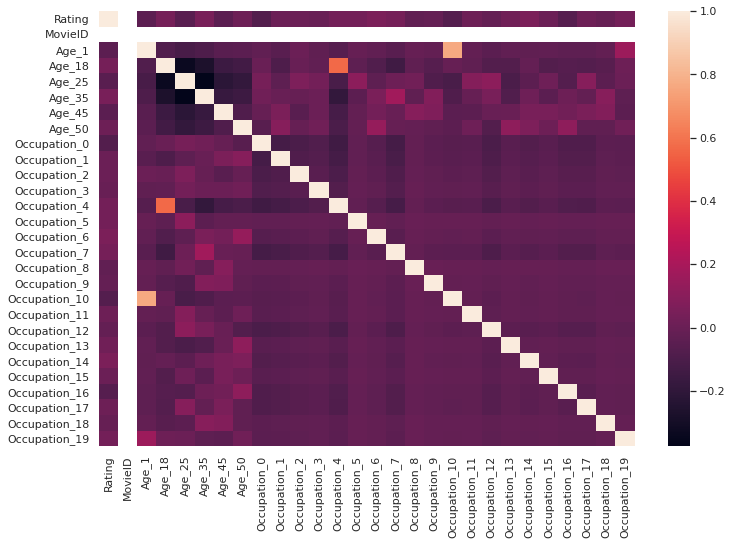

In [23]:
plt.figure(figsize = (12,8))
sns.heatmap(processed_dataset.corr())

In [24]:
X = processed_dataset.drop('Rating', axis=1)
y = processed_dataset['Rating']

#### Distribution of different ratings (1-5) in the first 500 record.

In [25]:
print('Occurence of rating 1 : ', sum(y ==1))
print('Occurence of rating 2 : ', sum(y ==2))
print('Occurence of rating 3 : ', sum(y ==3))
print('Occurence of rating 4 : ', sum(y ==4))
print('Occurence of rating 5 : ', sum(y ==5))

Occurence of rating 1 :  5
Occurence of rating 2 :  10
Occurence of rating 3 :  47
Occurence of rating 4 :  180
Occurence of rating 5 :  258


#### Splitting data into Training and test set.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=2)

#### Training the model.

In [27]:
xgb = DecisionTreeClassifier()
xgb.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

#### Performing prediction as well as generating classification report and accuracy score.

In [28]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.44      0.53      0.48        36
           5       0.67      0.53      0.59        59

    accuracy                           0.50       100
   macro avg       0.22      0.21      0.21       100
weighted avg       0.56      0.50      0.52       100

Accuracy Score:  0.5


/home/arizen/.virtualenvs/tranzemo/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/arizen/.virtualenvs/tranzemo/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/arizen/.virtualenvs/tranzemo/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Histogram for Age.

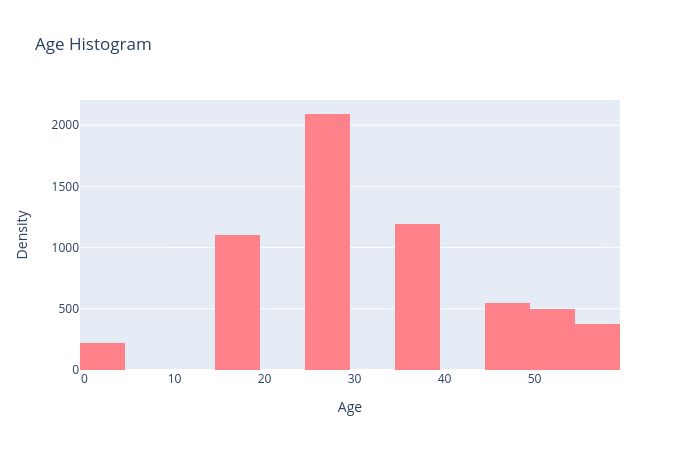

In [33]:
fig = go.Figure(data=[go.Histogram(x=users_dataset['Age'], marker_color='rgb(255, 130, 139)')], 
                layout=go.Layout({
                    'title': {'text': 'Age Histogram'},
                    'xaxis': {'title': {'text': 'Age'}},
                    'yaxis': {'title': {'text': 'Density'}},
                }))
fig.show('png') # Remove png to make plotly charts interactive

#### Histogram for Movie.

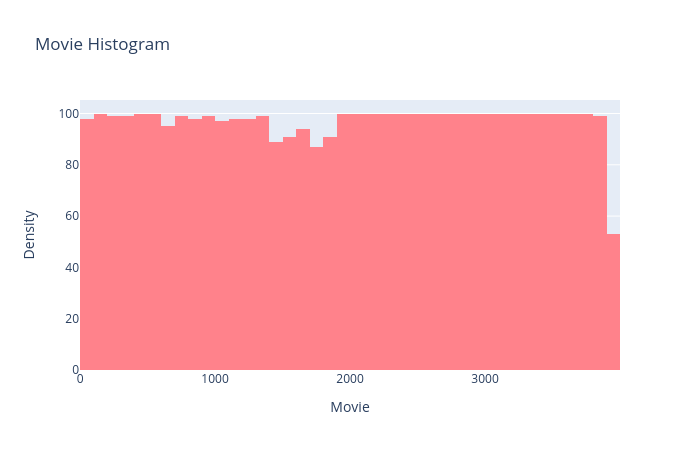

In [34]:
fig = go.Figure(data=[go.Histogram(x=movies_dataset['MovieID'], marker_color='rgb(255, 130, 139)')], 
                layout=go.Layout({
                    'title': {'text': 'Movie Histogram'},
                    'xaxis': {'title': {'text': 'Movie'}},
                    'yaxis': {'title': {'text': 'Density'}},
                }))
fig.show('png') # Remove png to make plotly charts interactive

#### Histogram for Occupation.

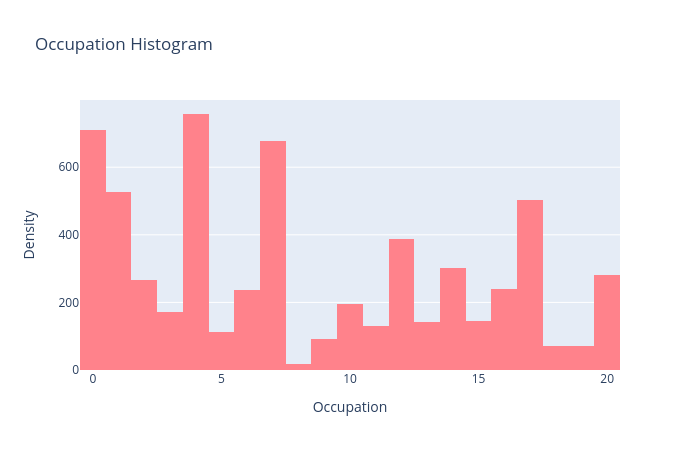

In [35]:
fig = go.Figure(data=[go.Histogram(x=users_dataset['Occupation'], marker_color='rgb(255, 130, 139)')], 
                layout=go.Layout({
                    'title': {'text': 'Occupation Histogram'},
                    'xaxis': {'title': {'text': 'Occupation'}},
                    'yaxis': {'title': {'text': 'Density'}},
                }))
fig.show('png') # Remove png to make plotly charts interactive